Link to Google Colab: https://colab.research.google.com/drive/1JHHEy713mG5keA-vVkVMVDCc8qHbKd0H

Install icalgosocdemo from pip using the following command

In [0]:
pip install -i https://test.pypi.org/simple/ icalgosocdemo==0.0.4

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 614kB 9.2MB/s 


In [0]:
from icalgodemo.strategy import Strategy
from collections import deque 
import numpy as np

## A simple MACD trading signal is used to illustrate how to use the package.

### Rebalancing frequency and the impact on PnL



Before smoothing the signal

In [0]:
class MyStrategy(Strategy):

    def before_trades(self):
      self.bidhist = deque(maxlen=1000)
      self.askhist = deque(maxlen=1000)
      self.midhist = deque(maxlen=1000)
      self.fast_length = 50
      self.slow_length = 400
      self.holdinghist = deque(maxlen=1000)
      return None 
    
    def ondata(self,bid,ask):

      self.bidhist.append(bid)
      self.askhist.append(ask)
      mid = (ask+bid)/2
      self.midhist.append(mid)
      fast_mean = np.array(self.midhist)[-self.fast_length:].mean()
      slow_mean = np.array(self.midhist)[-self.slow_length:].mean()

      if fast_mean >= slow_mean:
        signal = 1
      else:
        signal = -1
      self.holdinghist.append(signal)

      # warmup for history 
      if len(self.midhist)>=500:
        return signal
      else:
        return 0 


In [0]:
strat = MyStrategy()
strat.train()

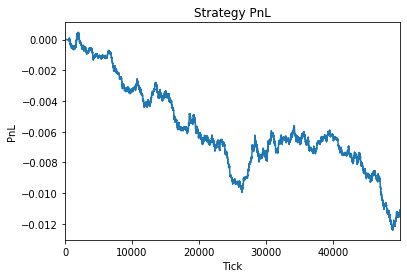

In [0]:
strat.plot_pnl()

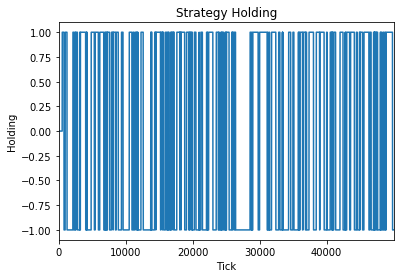

In [0]:
strat.plot_holding()

After smoothing the signal

In [0]:
class MyStrategy(Strategy):

    def before_trades(self):
      self.bidhist = deque(maxlen=1000)
      self.askhist = deque(maxlen=1000)
      self.midhist = deque(maxlen=1000)
      self.fast_length = 50
      self.slow_length = 400
      self.holdinghist = deque(maxlen=1000)
      return None 
    
    def ondata(self,bid,ask):
      self.bidhist.append(bid)
      self.askhist.append(ask)
      mid = (ask+bid)/2
      self.midhist.append(mid)
      fast_mean = np.array(self.midhist)[-self.fast_length:].mean()
      slow_mean = np.array(self.midhist)[-self.slow_length:].mean()
      
      if fast_mean >= slow_mean:
        signal = 1
      else:
        signal = -1
      self.holdinghist.append(signal)

      # warmup for history 
      if len(self.midhist)>=500:
        return np.array(self.holdinghist).mean()
      else:
        return 0 

    

In [0]:
strat = MyStrategy()
strat.train()

In [0]:
strat.save('Algosoc2019demo')

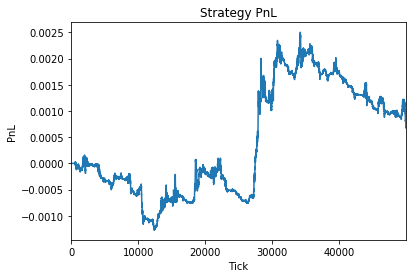

In [0]:
strat.plot_pnl()

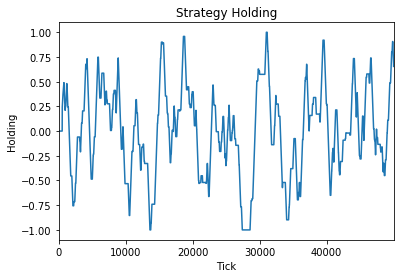

In [0]:
strat.plot_holding()

Documentation

Two functions before_trades and ondata needs to be provided for the strategy class

before_trades is the function that will run before loading the training or test data 

ondata is the function that runs through every data entry. The output is a float which represents the target exposure for the GBPUSD, positive means we go long in the next time stamp and negative means we go short in the next time stamp. The input arguements represents the bid and ask for the most recent time step

Rebalancing is done automatically by the system using the next available data.

Test data is password protected and will be made available later. You can save your model after training. 